In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support


from sklearn.model_selection import KFold
import numpy as np

In [3]:
df1 = pd.read_excel("real experimental decisions data for ML training (1) (1).xlsx")
df1


,group #,Treatment,Role,Baseline Rounds,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Treatment Rounds,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,...,Round 11,Round 12,Round 13,Round 14,Round 15,Round 16,Round 17,Round 18,Round 19,Round 20
1,1.0,Alternative,Farmer 1,pay,hold,hold,hold,hold,hold,hold,...,pay,alt,alt,alt,pay,alt,alt,alt,alt,pay
2,1.0,Alternative,Farmer 2,pay,hold,hold,pay,pay,hold,pay,...,hold,alt,alt,alt,hold,pay,alt,alt,alt,pay
3,1.0,Alternative,Farmer 3,pay,pay,hold,hold,pay,pay,pay,...,alt,pay,alt,alt,alt,alt,alt,alt,alt,alt
4,1.0,Alternative,Infra. State,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,24.0,Alternative,Farmer 2,pay,pay,pay,pay,pay,pay,pay,...,pay,pay,pay,pay,pay,pay,pay,pay,pay,pay
141,24.0,Alternative,Farmer 3,pay,pay,pay,pay,pay,pay,pay,...,pay,pay,pay,pay,pay,pay,pay,pay,pay,pay
142,24.0,Alternative,Infra. State,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
143,24.0,Alternative,Provider,invest,invest,invest,invest,invest,invest,invest,...,invest,invest,invest,invest,invest,invest,invest,invest,invest,invest


Threshold payment is an "outcome" variables based on the decisions of three farmers (farmers 1, 2, and 3)
Threshold payment = 1 if two or more farmers choose pay 
Threshold payment = 0 if otherwise

Infra. state is an  "outcome" variables based on the decisions of one provider and the status of threshold payment
Infra. State = 1 if threshold payment is 1 AND the provider chose invest 
Infra. State = 0 otherwise

We will first perform a logistic regression model on the data to understand how the dependent variable plays a role on the independent variable. 
This type of analysis can help you predict the likelihood of an event happening or a choice being made.
In order to esablish if the CP can accurately predict the provider's decisions, we need to see how accurate the correlation is with farmer and provider.

In [4]:
df = pd.read_csv("POL495.csv")
df

,Baseline or Treatment,Group #,Rounds,Provider,Threshold Payment,Outcome
0,Baseline,1,Round 1,keep,1,0
1,Baseline,1,Round 2,keep,0,0
2,Baseline,1,Round 3,keep,0,0
3,Baseline,1,Round 4,invest,0,0
4,Baseline,1,Round 5,keep,1,0
...,...,...,...,...,...,...
475,Treatment,24,Round 16,invest,1,1
476,Treatment,24,Round 17,invest,1,1
477,Treatment,24,Round 18,invest,1,1
478,Treatment,24,Round 19,invest,1,1


In [5]:
provider= pd.get_dummies(df.Provider)

In [6]:
df = df.join(provider)

In [7]:
mid = df['Outcome']
df.drop(labels=['Outcome'], axis=1, inplace = True)

In [8]:
df

,Baseline or Treatment,Group #,Rounds,Provider,Threshold Payment,invest,keep
0,Baseline,1,Round 1,keep,1,0,1
1,Baseline,1,Round 2,keep,0,0,1
2,Baseline,1,Round 3,keep,0,0,1
3,Baseline,1,Round 4,invest,0,1,0
4,Baseline,1,Round 5,keep,1,0,1
...,...,...,...,...,...,...,...
475,Treatment,24,Round 16,invest,1,1,0
476,Treatment,24,Round 17,invest,1,1,0
477,Treatment,24,Round 18,invest,1,1,0
478,Treatment,24,Round 19,invest,1,1,0


In [9]:
df.insert(7, 'Outcome', mid)
df

,Baseline or Treatment,Group #,Rounds,Provider,Threshold Payment,invest,keep,Outcome
0,Baseline,1,Round 1,keep,1,0,1,0
1,Baseline,1,Round 2,keep,0,0,1,0
2,Baseline,1,Round 3,keep,0,0,1,0
3,Baseline,1,Round 4,invest,0,1,0,0
4,Baseline,1,Round 5,keep,1,0,1,0
...,...,...,...,...,...,...,...,...
475,Treatment,24,Round 16,invest,1,1,0,1
476,Treatment,24,Round 17,invest,1,1,0,1
477,Treatment,24,Round 18,invest,1,1,0,1
478,Treatment,24,Round 19,invest,1,1,0,1


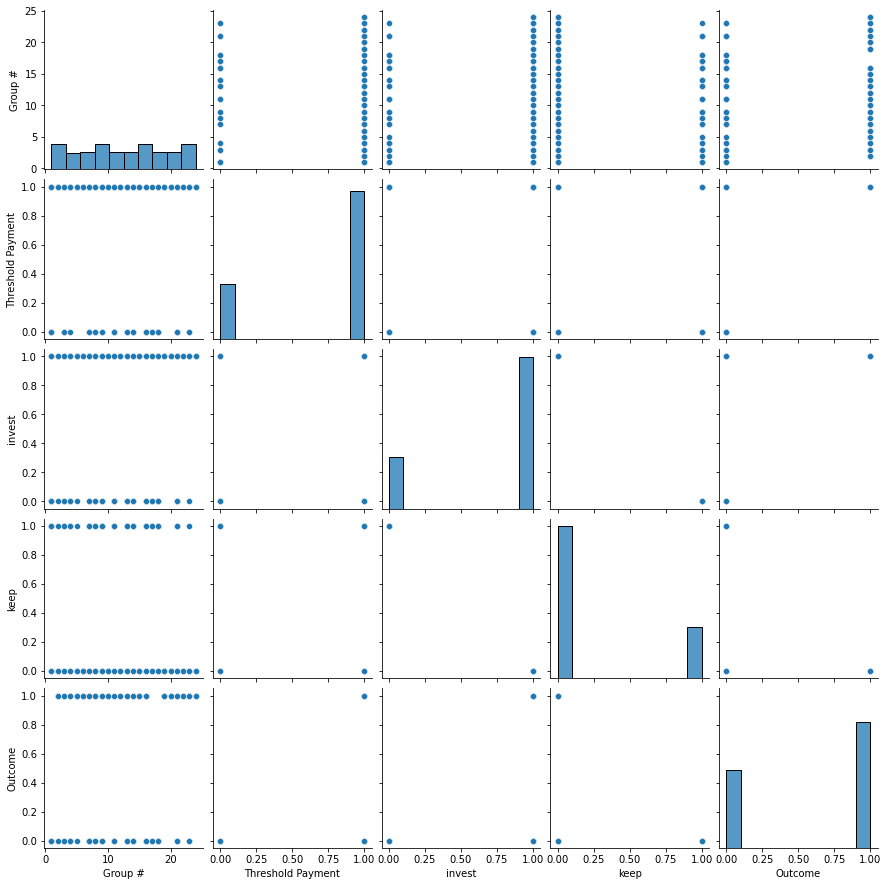

In [10]:
#plot pair plot to visualise the attributes all at once
sns.pairplot(data=df)

# Logistic Regression

In [11]:
X = df.iloc[:, 4:7].values
X
y = df.iloc[:, 7].values
X


array([[1, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [12]:
X_oversampled, y_oversampled = resample(X[y == 0],
                                        y[y == 0],
                                        replace=True,
                                        n_samples=X[y == 1].shape[0],
                                        random_state=123)
#
# Append the oversampled minority class to training data and related labels
#
X_balanced = np.vstack((X[y == 1], X_oversampled))
y_balanced = np.hstack((y[y == 1], y_oversampled))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [14]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [15]:
scores_logisitic = []
scores_logisitic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
scores_logisitic

[1.0]

In [16]:
kf3 = KFold(n_splits=3, shuffle=False)
kf3

KFold(n_splits=3, random_state=None, shuffle=False)

In [17]:
kf5 = KFold(n_splits=5, shuffle=False)
kf5

KFold(n_splits=5, random_state=None, shuffle=False)

In [18]:
kf10 = KFold(n_splits=10, shuffle=False)
kf10

KFold(n_splits=10, random_state=None, shuffle=False)

In [19]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2', solver= 'sag'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(solver= 'sag', C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

GridSearchCV(estimator=LogisticRegression(solver='sag'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [20]:
from sklearn.metrics import accuracy_score
#model = LogisticRegression(solver= 'sag')

k = 3
acc_score = []

for train_index , test_index in kf3.split(X_balanced):
    X_train, X_test, y_train, y_test = X_balanced[train_index], X_balanced[test_index], y_balanced[train_index], y_balanced[test_index]
    
    model = clf.fit(X_train,y_train)
    model.predict_proba(X_test)
    pred_test = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred_test)
    
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

accuracy of each fold - [1.0, 1.0, 1.0]
Avg accuracy : 1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


/Users/devanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/devanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/devanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/devanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/devanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/devanshi/opt/anaconda3/lib/p

In [9]:
df.insert(7, 'Outcome', mid)
df

,Baseline or Treatment,Group #,Rounds,Provider,Threshold Payment,invest,keep,Outcome
0,Baseline,1,Round 1,keep,1,0,1,0
1,Baseline,1,Round 2,keep,0,0,1,0
2,Baseline,1,Round 3,keep,0,0,1,0
3,Baseline,1,Round 4,invest,0,1,0,0
4,Baseline,1,Round 5,keep,1,0,1,0
...,...,...,...,...,...,...,...,...
475,Treatment,24,Round 16,invest,1,1,0,1
476,Treatment,24,Round 17,invest,1,1,0,1
477,Treatment,24,Round 18,invest,1,1,0,1
478,Treatment,24,Round 19,invest,1,1,0,1


In [36]:
group = df['Group #']

In [70]:
grouped = df.groupby(group)
df_new = grouped.get_group(3)
df_new


,Baseline or Treatment,Group #,Rounds,Provider,Threshold Payment,invest,keep,Outcome
40,Baseline,3,Round 1,keep,1,0,1,0
41,Baseline,3,Round 2,invest,1,1,0,1
42,Baseline,3,Round 3,keep,1,0,1,0
43,Baseline,3,Round 4,invest,1,1,0,1
44,Baseline,3,Round 5,keep,1,0,1,0
45,Baseline,3,Round 6,invest,1,1,0,1
46,Baseline,3,Round 7,invest,1,1,0,1
47,Baseline,3,Round 8,keep,1,0,1,0
48,Baseline,3,Round 9,invest,1,1,0,1
49,Baseline,3,Round 10,invest,1,1,0,1


The farmer then observes outcomes of Round T
<br>If threshold payment is 0:
<br>-not enough farmers chose pay so threshold payment = 0. 
<br>-even if the provider chose invest, infra. State will be 0

If threshold payment = 1:
<br>-enough farmers chose to pay so threshold payment = 1. 
<br>-If the provider also chose to be cooperative (invest), then infra. State will be 1

If threshold payment is 1:
<br>-enough farmers chose to pay and threshold payment = 1. 
<br>-If the provider also chose to be non-cooperative (keep), then infra. State will be 0

In [34]:
farmer_pay = df['Threshold Payment']
provider_invest = df['invest']
provider_keep = df['keep']
group = df['Group #']
rounds = df['Rounds']

In [99]:
def iter_farmer(T, prev_state, adjust_pay):


    infra_state = 0
    if (farmer_pay.iat[T] == 1 and provider_invest.iat[T] == 1):
        infra_state =1
    elif (farmer_pay.iat[T] == 0 and provider_keep.iat[T] ==1):
        infra_state = 0

#if adjust_pay == 1:
# if prev_state == 0 and farmer_pay.iat[T] == 1:
        return infra_state

In [75]:
rounds = df['Rounds']

In [94]:
def farmer_decision(round):
    outcome = 0
    #farmer_input= input("Will you pay or keep payment: ")
    print(farmer_pay)
   
    return outcome

In [95]:
#computer is provider: tit for tat
#if farmers pay, then provider also pays
#if farmers dont pay, provider
def computer_provider(round):
    provider =0
    farmer_input= input("Will you pay or keep payment: ")
    if farmer_input ==1:
        provider ==1
        
    if farmer_input==0:
        provider ==0
    return provider

# Making Predictions- Logistic Regression

In [97]:
# make predictions
yhat = model.predict(X)
# evaluate predictions
acc = accuracy_score(y, yhat)
print(acc)

1.0


In [184]:
# define input
new_input = [[1, 0, 1]]

In [185]:
new_output = model.predict(new_input)

In [186]:
new_output = model.predict(new_input)
print(new_input, new_output)

[[1, 0, 1]] [0]


In [120]:
# make predictions on the entire training dataset
yhat = model.predict(X)

In [125]:
print(X[0], yhat[0])

[1 0 1] 0


In [126]:
# connect predictions with outputs
for i in range(10):
    print(X[i], yhat[i])

[1 0 1] 0
[0 0 1] 0
[0 0 1] 0
[0 1 0] 0
[1 0 1] 0
[0 0 1] 0
[1 0 1] 0
[1 0 1] 0
[0 0 1] 0
[0 0 1] 0


In [49]:
# make predictions on the entire training dataset
yhat = model.predict(X)
# connect predictions with outputs
for i in range(10):
    print(X[i], yhat[i])

[1 0 1] 0
[0 0 1] 0
[0 0 1] 0
[0 1 0] 0
[1 0 1] 0
[0 0 1] 0
[1 0 1] 0
[1 0 1] 0
[0 0 1] 0
[0 0 1] 0


# Random Value Predictions

Make predictions based on randomized decisions by both users and provider

In [179]:
random = np.random.choice([0, 1], size=(20,3))
random

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 1],
       [0, 0, 0]])

In [180]:
# make predictions on the entire training dataset
yhat = model.predict(random)
# connect predictions with outputs
for i in range(10):
    print(random[i], yhat[i])

[1 0 1] 0
[1 0 1] 0
[1 0 0] 1
[0 1 1] 0
[1 0 0] 1
[1 1 0] 1
[0 0 0] 0
[1 0 1] 0
[1 1 0] 1
[0 0 0] 0


# Decision Trees

In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)


In [70]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [71]:
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [72]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [73]:
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [74]:
  
# Driver code
def main():
      
    # Building Phase
    #X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1
 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0]
Confusion Matrix:  [[55  0]
 [ 0 89]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        89

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Results Using Entropy:
Predicted values:
[1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1
 0 0

# Making predictions- Decision Tree

In [96]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [100]:
# predicting a new value
  
# test the output by changing values, like 3750
y_pred = regressor.predict([[1,0,1]])
  
# print the predicted price
print("Predicted outcome: % d\n"% y_pred) 

Predicted outcome:  0



In [104]:
# Defining the decision tree 
algorithmdtree=DecisionTreeClassifier()
algorithmdtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [106]:
y_pred = algorithmdtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        89

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



Text(0.5, 1.0, 'Accuracy Score: 1.0')

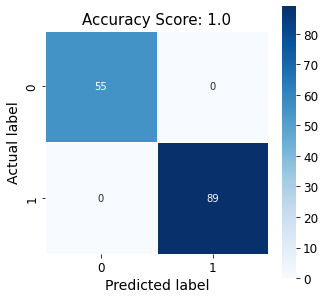

In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(algorithmdtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [114]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [118]:
n_nodes = algorithmdtree.tree_.node_count
children_left = algorithmdtree.tree_.children_left
children_right = algorithmdtree.tree_.children_right
feature = algorithmdtree.tree_.feature
threshold = algorithmdtree.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 0.5 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 0.5 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


[Text(0.4, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.472\nsamples = 336\nvalue = [128, 208]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.252\nsamples = 244\nvalue = [36, 208]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 208\nvalue = [0, 208]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]')]

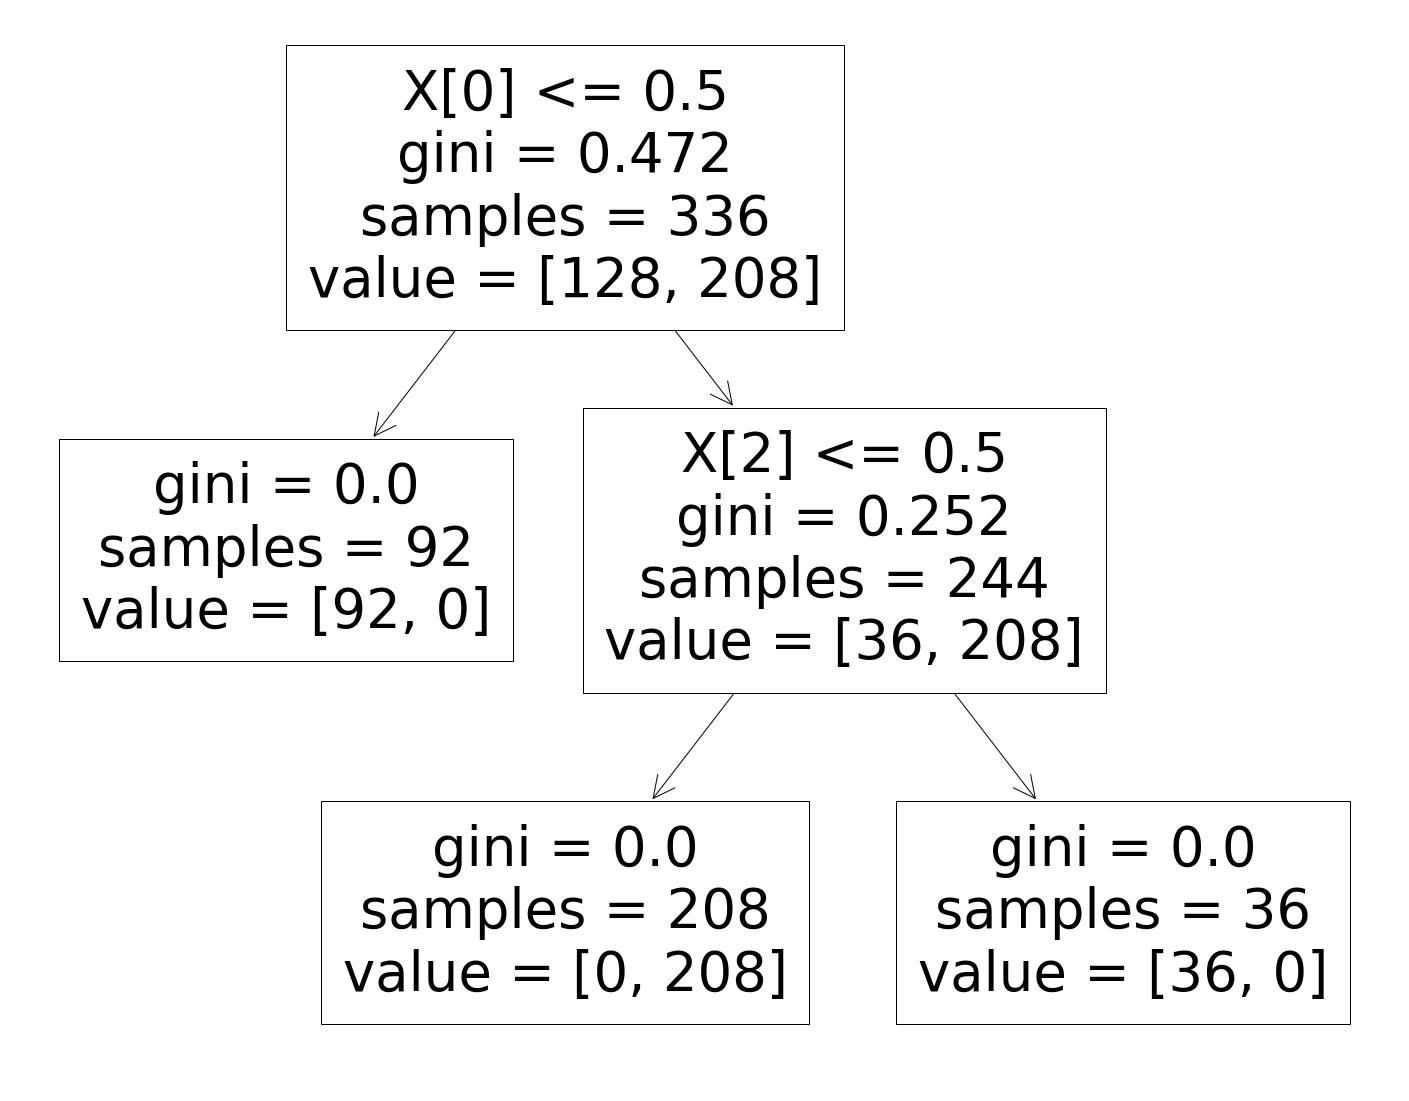

In [117]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(algorithmdtree)

In [119]:
node_indicator = algorithmdtree.decision_path(X_test)
leaf_id = algorithmdtree.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 0] = 1) > 0.5)
decision node 2 : (X_test[0, 2] = 0) <= 0.5)
